In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df = pd.read_csv("payment_fraud.csv")

In [62]:
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,paypal,28.204861,0
1,725,1,4.742303,storecredit,0.000000,0
2,845,1,4.921318,creditcard,0.000000,0
3,503,1,4.886641,creditcard,0.000000,0
4,2000,1,5.040929,creditcard,0.000000,0


In [206]:
df['numItems'].value_counts()

numItems
1     37398
2      1348
5       168
3       164
10       71
4        42
6        15
8         5
7         5
12        1
15        1
29        1
9         1
11        1
Name: count, dtype: int64

In [208]:
df['paymentMethod'].value_counts()


paymentMethod
0    28004
1     9303
2     1914
Name: count, dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  object 
 4   paymentMethodAgeDays  39221 non-null  float64
 5   label                 39221 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 1.8+ MB


In [66]:
df.describe()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,label
count,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000
mean,857.563984,1.084751,4.748232,122.641326,0.014278
std,804.788212,0.566899,0.389360,283.569177,0.118636
min,1.000000,1.000000,0.421214,0.000000,0.000000
25%,72.000000,1.000000,4.742303,0.000000,0.000000
50%,603.000000,1.000000,4.886641,0.012500,0.000000
75%,1804.000000,1.000000,4.962055,87.510417,0.000000
max,2000.000000,29.000000,5.040929,1999.580556,1.000000


<Axes: xlabel='paymentMethod', ylabel='count'>

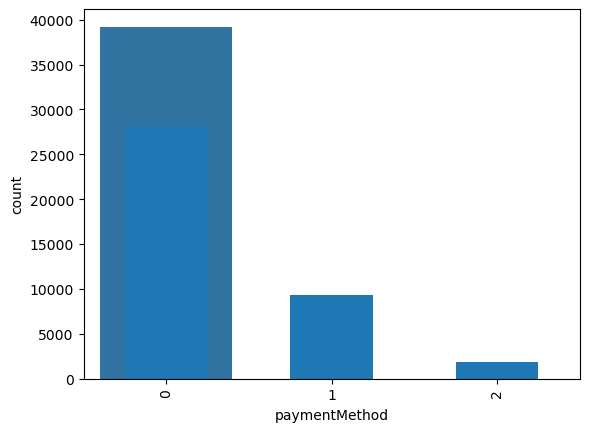

In [154]:
sns.countplot(df['paymentMethod'])
df['paymentMethod'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

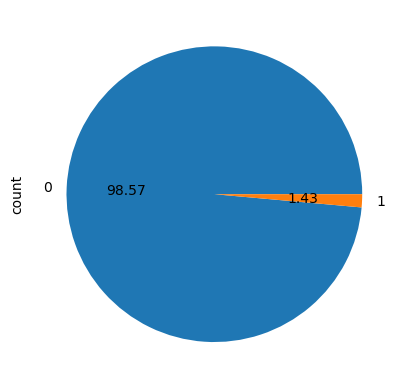

In [204]:
df['label'].value_counts().plot(kind='pie',autopct='%.2f')

<BarContainer object of 39221 artists>

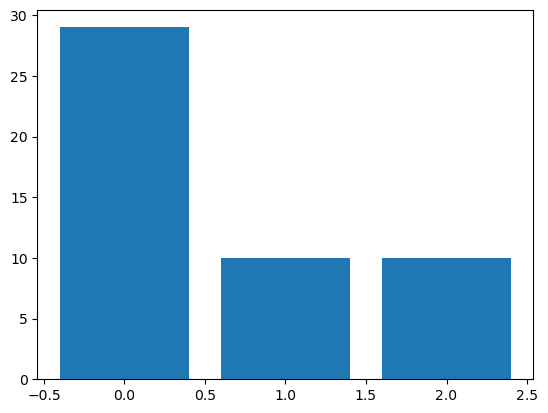

In [212]:
plt.bar(df['paymentMethod'],df['numItems'])

In [156]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['paymentMethod'] = encoder.fit_transform(df['paymentMethod'])

In [158]:
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,1,28.204861,0
1,725,1,4.742303,2,0.000000,0
2,845,1,4.921318,0,0.000000,0
3,503,1,4.886641,0,0.000000,0
4,2000,1,5.040929,0,0.000000,0


In [160]:
from sklearn.model_selection import train_test_split

In [162]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('label', axis=1), df['label'],
    test_size=0.33, random_state=17)

In [164]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [168]:
svc = SVC(kernel='sigmoid', gamma=1.0).fit(X_train, y_train)
knc = KNeighborsClassifier().fit(X_train, y_train)
mnb = MultinomialNB().fit(X_train, y_train)
dtc = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)
lrc = LogisticRegression(solver='liblinear', penalty='l1').fit(X_train, y_train)
rfc = RandomForestClassifier(n_estimators=50, random_state=2).fit(X_train, y_train)
abc = AdaBoostClassifier(n_estimators=50, random_state=2).fit(X_train, y_train)
bc = BaggingClassifier(n_estimators=50, random_state=2).fit(X_train, y_train)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2).fit(X_train, y_train)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2).fit(X_train, y_train)

In [170]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
}


In [172]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [174]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [176]:
train_classifier(svc,X_train,y_train,X_test,y_test)

C:\Users\Shubham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.9853202503283628, 0.0)

In [178]:
train_classifier(knc,X_train,y_train,X_test,y_test)

(0.9998454763192459, 0.9947368421052631)

In [180]:
train_classifier(mnb,X_train,y_train,X_test,y_test)

(0.9029591284864406, 0.1313969571230982)

In [182]:
train_classifier(dtc,X_train,y_train,X_test,y_test)

(1.0, 1.0)

In [184]:
train_classifier(lrc,X_train,y_train,X_test,y_test)

(1.0, 1.0)

In [186]:
train_classifier(rfc,X_train,y_train,X_test,y_test)

(1.0, 1.0)

In [187]:
train_classifier(rfc,X_train,y_train,X_test,y_test)

(1.0, 1.0)

In [190]:
train_classifier(abc,X_train,y_train,X_test,y_test)

(1.0, 1.0)

In [192]:
train_classifier(bc,X_train,y_train,X_test,y_test)

(1.0, 1.0)

In [194]:
train_classifier(etc,X_train,y_train,X_test,y_test)

(0.9995364289577378, 1.0)

In [196]:
train_classifier(gbdt,X_train,y_train,X_test,y_test)

(1.0, 1.0)

In [198]:
y_pred = dtc.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[12753     0]
 [    0   190]]


In [200]:
y_pred = lrc.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[12753     0]
 [    0   190]]


In [202]:
y_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[12753     0]
 [    0   190]]
